##Sbox analysis

###Difference Distribution table

In [ ]:
import numpy as np
def ddt(Sbox):
   from operator import xor
   n=len(Sbox)
   DDT_Table=[[0]*n for i in range(n)]
   for j in range(n):
      for k in range(n):
        xor1=xor(j,k)
        xor2=xor(Sbox[j],Sbox[k])
        DDT_Table[xor1][xor2]+=1
   return DDT_Table 
Sbox=[11,15,3,2,10,12,9,1,6,7,8,0,14,5,13,4]
print(' DDT',np.matrix(ddt(Sbox)),sep='\n')

 DDT
[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  2  0  2  0  4  2  0  2  0  0  0  0]
 [ 0  2  0  4  0  0  0  2  2  0  0  0  0  4  2  0]
 [ 0  0  0  0  0  2  2  0  2  2  2  2  2  0  0  2]
 [ 0  2  2  4  2  2  0  0  2  0  2  0  0  0  0  0]
 [ 0  0  2  2  0  2  0  2  0  2  0  2  2  2  0  0]
 [ 0  0  2  2  0  2  2  0  0  2  0  2  0  0  4  0]
 [ 0  0  2  0  0  0  2  0  2  0  4  0  0  2  2  2]
 [ 0  0  2  0  4  2  0  0  2  2  0  2  0  2  0  0]
 [ 0  0  2  2  0  0  0  0  0  2  2  0  4  2  0  2]
 [ 0  0  0  2  2  4  0  4  2  0  0  0  0  0  0  2]
 [ 0  2  0  0  4  0  0  2  0  0  0  2  2  0  2  2]
 [ 0  4  0  0  0  2  2  0  0  0  2  2  2  0  2  0]
 [ 0  2  0  0  0  0  0  2  0  4  2  0  0  2  2  2]
 [ 0  0  2  0  0  0  4  2  0  0  0  2  2  2  0  2]
 [ 0  0  2  0  2  0  2  2  0  0  2  0  2  0  2  2]]


In [ ]:
for i,j in enumerate(ddt(Sbox)):
  count=0
  for x in j:
    if(x!=0):
      count+=1
  print(f'For input difference {i} --> Output difference is {count}')

For input difference 0 --> Output difference is 1
For input difference 1 --> Output difference is 6
For input difference 2 --> Output difference is 6
For input difference 3 --> Output difference is 8
For input difference 4 --> Output difference is 7
For input difference 5 --> Output difference is 8
For input difference 6 --> Output difference is 7
For input difference 7 --> Output difference is 7
For input difference 8 --> Output difference is 7
For input difference 9 --> Output difference is 7
For input difference 10 --> Output difference is 6
For input difference 11 --> Output difference is 7
For input difference 12 --> Output difference is 7
For input difference 13 --> Output difference is 7
For input difference 14 --> Output difference is 7
For input difference 15 --> Output difference is 8


###Differential Uniformity

In [ ]:
for i in ddt(Sbox):
  for j in i:
      if(len(set(i))==3):
        a=max(set(i))
print("The differential uniformity is :",a) 

The differential uniformity is : 4


###Differential Branch Number

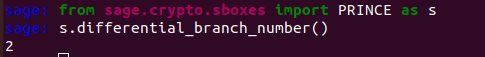


In [ ]:
#non zero entries
count=0
for i in ddt(Sbox):
  for j in i:
      if (j!=0):
        count+=1
print(count)

106


###Linear Approximation Table

In [ ]:
def lat(Sbox):  
    LAT = [[0]*16 for i in range(16)]
    for alpha in range(16):
        for beta in range(16):
            total = 0
            for input in range(16):
                input_masked = input & alpha
                output_masked = Sbox[input] & beta
                if (bin(input_masked).count("1") - bin(output_masked).count("1")) % 2 == 0:
                    total += 1 
       #Converting to Bias Form - Relative to P[1/2]
            LAT[alpha][beta]= total - 16//2
        
    return LAT

In [ ]:
print('LAT', np.matrix(lat(Sbox)),sep='\n\n')

LAT

[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -2 -2  2 -2  0  4 -4  0 -2  2 -2 -2  0  0]
 [ 0  0 -4  0 -4  0  0  0 -2 -2  2 -2 -2  2  2  2]
 [ 0  4 -2 -2  2 -2  0  0  2  2  4  0  0  0  2 -2]
 [ 0  0 -4  4  2  2  2  2  2  2 -2 -2  0  0  0  0]
 [ 0  0  2  2  0 -4 -2  2  2 -2  0 -4 -2 -2  0  0]
 [ 0 -4  0  0 -2 -2  2 -2  0  4  0  0 -2 -2  2 -2]
 [ 0  0  2 -2  0  0 -2  2  0  4 -2 -2  0  4  2  2]
 [ 0 -2 -2  0  4 -2 -2 -4 -2  0  0 -2  2  0  0  2]
 [ 0 -2  0  2  2  0 -2  0  2  0  2  4 -4  2  0  2]
 [ 0  2  2  4  0  2 -2  0 -4  2  2  0  0 -2  2  0]
 [ 0 -2  0 -2  2  4 -2  0  0 -2  0 -2 -2  0  2 -4]
 [ 0 -2 -2  0 -2  0 -4  2  0  2  2  0  2  0 -4 -2]
 [ 0 -2  0  2  0 -2  0  2  0 -2  0  2  4  2  4 -2]
 [ 0 -2  2  0  2  0  4  2 -2  0  4 -2  0  2 -2  0]
 [ 0  2  0  2  0 -2  0 -2 -2  0 -2  0 -2  4 -2 -4]]


In [ ]:
for i,j in enumerate(lat(Sbox)):
  count=0
  for x in j:
    if(x!=0):
      count+=1
  print(f'For input difference {i} --> Output difference is {count}')

For input difference 0 --> Output difference is 1
For input difference 1 --> Output difference is 10
For input difference 2 --> Output difference is 10
For input difference 3 --> Output difference is 10
For input difference 4 --> Output difference is 10
For input difference 5 --> Output difference is 10
For input difference 6 --> Output difference is 10
For input difference 7 --> Output difference is 10
For input difference 8 --> Output difference is 10
For input difference 9 --> Output difference is 10
For input difference 10 --> Output difference is 10
For input difference 11 --> Output difference is 10
For input difference 12 --> Output difference is 10
For input difference 13 --> Output difference is 10
For input difference 14 --> Output difference is 10
For input difference 15 --> Output difference is 10
